# https://towardsdatascience.com/an-introduction-to-web-scraping-with-python-a2601e8619e5

In [2]:
###############################################################
###### Import necessary dependancy#######
#############################################################

import pandas as pd
import numpy as np

###############################################################
###### Import necessary dependancy#######
#############################################################-

import pandas as pd
import numpy as np

###############################################################
###### Import necessary  library for  scraping more page#######
############################################################

from bs4 import BeautifulSoup # Import Beautifulsoup to scraping the web pafr
from requests import get # import get from request to get all the pa
main_url = "http://books.toscrape.com/index.html"
import requests
result = requests.get(main_url)
result.text[:1000]
from requests import get 

# import get from request to get all the pa
###############################################################
###### Import necessary  library to look on the different page######
#############################################################
from time import sleep
from random import randint

from time import time
from IPython.core.display import clear_output # Since we’re going to make 72 requests,Our work will look a bit untidy 
                                              #. To avoid that, we’ll clear the output after each iteration
import warnings
from bs4 import BeautifulSoup # Import Beautifulsoup to scraping the web pafr
import re

###############################################################
###### Import necessary  library to make instogramme
#############################################################

import matplotlib.pyplot as plt
%matplotlib inline 
#print('Matplotlib version'+plt.__version__ )

In [2]:
main_url = "https://www.labonnepierre.com/fr/recherche/apport-100000/mensualite-0/duree-0-ans/1/?sort=profitability&direction=desc"

import requests
result = requests.get(main_url)
#result.text[:1000]

In [216]:
soup = BeautifulSoup(result.text, 'html.parser')
#print(soup.prettify()[:1000])

In [193]:
#def getAndParseURL(url):
 #   result = requests.get(url)
  #  soup = BeautifulSoup(result.text, 'html.parser')
   # return(soup)

In [217]:
house_containers=soup.find_all('div', class_ = 'product-list-item container-fluid ')
house_containers

[<div class="product-list-item container-fluid ">
 <div class="row">
 <div class="col-md-4 col-xs-4 product-image">
 <a href="/fr/local-commercial/nord-ouest/111686-bar-appartement.html">
 <img alt="" class="product-img img-responsive" src="https://www.labonnepierre.com/cache/medium/uploads/property/1822e01183cef0b27cc00fc1f7b72baa.jpg"/>
 </a>
 </div>
 <div class="col-md-6 col-xs-8 product-infos">
 <div class="row">
 <div class="col-md-5 trailer">
 <h2 class="title blue-text">
 <a href="/fr/local-commercial/nord-ouest/111686-bar-appartement.html" title="Bar + Appartement">
                                 Bar + Appartement
                             </a>
 </h2>
 <p class="region">
 <a class="orange-text" href="/fr/local-commercial/nord-ouest/111686-bar-appartement.html">
                             nancy <span>(Lorraine)</span>
 </a>
 </p>
 </div>
 <div class="col-md-7 col-xs-12 cartridges">
 <div class="row">
 <div class="col-md-6 col-xs-11 cartridge price">
 <span class="text-mut

In [218]:
avion=soup.find_all("div", {"class" : "col-md-4 col-xs-4 product-image"}.get(0))
avion

[<div class="container-fluid border-bottom mobile-app-hidden">
 <div class="container">
 <div class="row header-top">
 <div class="col-lg-7 hidden-xs pull-left">1er site de mise en relation entre investisseurs et vendeurs de biens loués</div>
 <div class="col-lg-5" id="menu-top-header">
 <ul class="pull-right hidden-xs">
 <li class="header-btn">
 <a class="btn btn-primary" href="/fr/annonce/creer" role="button">Déposer une annonce</a>
 </li>
 <li class="hidden-xs">
 <a data-target="#profile-registration-type" data-toggle="modal" href="#">
 <span class="fa-stack fa-1x">
 <i class="fa fa-user fa-stack-1x"></i>
 </span>
                                 S'inscrire
                             </a>
 </li>
 <li class="hidden-xs">
 <a href="/login">
 <span class="fa-stack fa-1x">
 <i class="fa fa-pencil fa-stack-1x"></i>
 </span>
                                 S'identifier
                             </a>
 </li>
 </ul>
 <ul id="header-menu-mobile">
 <li class="header-btn">
 <a class="btn b

### Find all the urls on the webpage

In [219]:
main_page_products_urls = [x.h2.a.get('href') for x in soup.findAll("div", class_ = "col-md-5 trailer")]

print(str(len(main_page_products_urls)) + " fetched products URLs")
print("One example:")
main_page_products_urls[0]

34 fetched products URLs
One example:


'/fr/immeuble/ndf/86408-immeuble-caux.html'

In [220]:
#Declare all the variable
names = []
regions = []
prix_vente = []
ratings=[]
main_page_products_urls = []

pages = [str(i) for i in range(1,5)]

# For every page in the interval 1-4

for count in house_containers:
    
    name = count.h2.a.text # Extract ne name on the page and stock it in the matrix name
    names.append(name)
    
    # Find all the region where there is the page
    region = count.find('a', class_ = 'orange-text').text
    regions.append(region)
    
    # Find all the prix in the page to the products
    prix = count.find('p', class_ = 'text-right').text
    prix_vente.append(float(prix)*1000)
    
    # Find all the rating associate to the products
    rating = count.find('div', class_ = 'rent-cartridge').text
    ratings.append(rating)
    
    # Find all the links associate to the products
    main_page_products= count.find("div", class_ = "col-md-5 trailer").h2.a.get('href')
    main_page_products_urls.append("https://www.labonnepierre.com"+ main_page_products)
       
df = pd.DataFrame({'Product': names,
'regions': regions,
'Prix': prix_vente,
'rentabilite': ratings,
'Lien':main_page_products_urls
})
df = df.replace('\n',' ', regex=True) 
df=df[['Product', 'rentabilite','regions','Prix', 'Lien']]
df[0:5]


,Product,rentabilite,regions,Prix,Lien
0,Bar + Apparte...,"25,71",nancy (Lorraine),38000,https://www.labonnepierre.com/fr/local-commerc...
1,MAGNIFIQUE IM...,"23,90",Fourmies (Nord-pa...,577500,https://www.labonnepierre.com/fr/immeuble/nord...
2,"Proche Huppy,...","21,82",Huppy (Picardie),44000,https://www.labonnepierre.com/fr/entrep%C3%B4t...
3,IMMEUBLE rue ...,"19,73",DENAIN (Nord-pas-...,36500,https://www.labonnepierre.com/fr/immeuble/nord...
4,Immeuble de r...,"19,38",DENAIN (Nord-pas-...,96000,https://www.labonnepierre.com/fr/immeuble/nord...


In [ ]:
#Declare all the variable
names = []
regions = []
prix_vente = []
ratings=[]
main_page_products_urls = []

# Preparing the monitoring of the loop
start_time = time()
requests = 0

pages = [str(i) for i in range(1,70)] # Ininititalisation du paramètre page dans la boucle
years_url = [str(i) for i in range(2000,2001)] # Initialisation du paramètre years_url dans la boucle
#i=[0:4]
# For every year in the interval 2000-2017
for year_url in years_url:
    
#pages = [str(i) for i in range(1,5)] # Ininititalisation du paramètre page dans la boucle
    # For every page in the interval 1-4
    for page in pages:

        # Make a get request
        response = get('https://www.labonnepierre.com/fr/recherche/apport-100000/mensualite-0/duree-0-ans/'+page+'/?sort=profitability&direction=desc')
        # Pause the loop
        sleep(randint(8,15))

        # Monitor the requests
        requests += 1
        elapsed_time = time() - start_time
        print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
        clear_output(wait = True)

        # Throw a warning for non-200 status codes
        if response.status_code != 200:
            warn('Request: {}; Status code: {}'.format(requests, response.status_code))

        # Break the loop if the number of requests is greater than expected
        if requests > 72:
            warn('Number of requests was greater than expected.')
            break

        # Parse the content of the request with BeautifulSoup
        page_html = BeautifulSoup(response.text, 'html.parser')

        # Select all the 50 movie containers from a single page
        house_containers = page_html.find_all('div', class_ = 'product-list-item container-fluid ')

        # For every movie of these 50
        for count in house_containers:
            # If the movie has a Metascore, then:
           # if container.find('div', class_ = 'ratings-metascore') is not None:

            # Scrape the name
            name = count.h2.a.text 
            names.append(name)

            # Find all the region where there is the page
            region = count.find('a', class_ = 'orange-text').text
            regions.append(region)

            # Find all the prix in the page to the products
            prix = count.find('p', class_ = 'text-right').text
            prix_vente.append(str(prix))

            # Find all the rating associate to the products
            rating = count.find('div', class_ = 'rent-cartridge').text
            ratings.append(rating)

                # Find all the links associate to the products
            main_page_products= count.find("div", class_ = "col-md-5 trailer").h2.a.get('href')
            main_page_products_urls.append("https://www.labonnepierre.com"+ main_page_products)
           # page=page+1

In [212]:
df = pd.DataFrame({'Product': names,
'regions': regions,
'Prix': prix_vente,
'rentabilite': ratings,
'Lien':main_page_products_urls
 })
df = df.replace('\n',' ', regex=True) 
df=df[['Product', 'rentabilite','regions','Prix', 'Lien']]
#df.shape
df

,Product,rentabilite,regions,Prix,Lien
0,Immeuble de r...,"13,54",Sallaumines (Nord...,210000,https://www.labonnepierre.com/fr/immeuble/nord...
1,Grand apparte...,"13,53",Le Vigan (Langued...,40000,https://www.labonnepierre.com/fr/appartement/n...
2,Immeuble de r...,"13,46",Calais (Nord-pas-...,178000,https://www.labonnepierre.com/fr/immeuble/nord...
3,En exclusivit...,"13,43",Marseille 14eme a...,67000,https://www.labonnepierre.com/fr/appartement/n...
4,Immeuble D'ha...,"13,37",Hénin-Beaumont (N...,140000,https://www.labonnepierre.com/fr/immeuble/nord...
5,Maison sur 4 ...,"13,33",dasle (Franche-co...,108000,https://www.labonnepierre.com/fr/maison/nord-o...
6,AMELIE LES BA...,"13,33",amelie les bains ...,22500,https://www.labonnepierre.com/fr/appartement/n...
7,Immeuble en c...,"13,28",autignac (Langued...,128000,https://www.labonnepierre.com/fr/immeuble/nord...
8,6 STUDIOS MEU...,"13,21",belfort (Franche-...,199900,https://www.labonnepierre.com/fr/immeuble/nord...
9,Immeuble de r...,"13,19",Saint-Omer (Nord-...,136500,https://www.labonnepierre.com/fr/immeuble/nord...


### Save the datein in the CSV Datei Files

In [125]:
df.to_csv('immobilienLaBonnePierre.csv')

NameError: name 'df' is not defined

In [23]:
#x = "This is a sentence. (once a day) [twice a day]"
#re.sub("[\(\[].*?[\)\]]", "", x)

#### Import the store files 

In [53]:
dh=pd.read_csv('immobilienLaBonnePierre.csv')
dh.head()

,Unnamed: 0,Product,rentabilite,regions,Prix,Lien
0,0,Bar + Apparte...,"25,71",nancy (Lorraine),38.000,https://www.labonnepierre.com/fr/local-commerc...
1,1,MAGNIFIQUE IM...,"23,90",Fourmies (Nord-pa...,577.500,https://www.labonnepierre.com/fr/immeuble/nord...
2,2,"Proche Huppy,...","21,82",Huppy (Picardie),44.000,https://www.labonnepierre.com/fr/entrep%C3%B4t...
3,3,IMMEUBLE rue ...,"19,73",DENAIN (Nord-pas-...,36.500,https://www.labonnepierre.com/fr/immeuble/nord...
4,4,Immeuble de r...,"19,38",DENAIN (Nord-pas-...,96.000,https://www.labonnepierre.com/fr/immeuble/nord...


## Split the regions in Town and Regions

In [54]:
#Split the retion in two part Town and Regions  
dh[['Town','Regions']] = dh.regions.str.split('\(|\)', expand=True).iloc[:,[0,1]]
dh.head()

,Unnamed: 0,Product,rentabilite,regions,Prix,Lien,Town,Regions
0,0,Bar + Apparte...,"25,71",nancy (Lorraine),38.000,https://www.labonnepierre.com/fr/local-commerc...,nancy,Lorraine
1,1,MAGNIFIQUE IM...,"23,90",Fourmies (Nord-pa...,577.500,https://www.labonnepierre.com/fr/immeuble/nord...,Fourmies,Nord-pas-de-calais
2,2,"Proche Huppy,...","21,82",Huppy (Picardie),44.000,https://www.labonnepierre.com/fr/entrep%C3%B4t...,Huppy,Picardie
3,3,IMMEUBLE rue ...,"19,73",DENAIN (Nord-pas-...,36.500,https://www.labonnepierre.com/fr/immeuble/nord...,DENAIN,Nord-pas-de-calais
4,4,Immeuble de r...,"19,38",DENAIN (Nord-pas-...,96.000,https://www.labonnepierre.com/fr/immeuble/nord...,DENAIN,Nord-pas-de-calais


In [55]:
# Remove the column regions in the dataframe from the 
dh1 = dh.drop(['regions'], axis=1)
dh1.head()
#dhnew.dtypes 

,Unnamed: 0,Product,rentabilite,Prix,Lien,Town,Regions
0,0,Bar + Apparte...,"25,71",38.000,https://www.labonnepierre.com/fr/local-commerc...,nancy,Lorraine
1,1,MAGNIFIQUE IM...,"23,90",577.500,https://www.labonnepierre.com/fr/immeuble/nord...,Fourmies,Nord-pas-de-calais
2,2,"Proche Huppy,...","21,82",44.000,https://www.labonnepierre.com/fr/entrep%C3%B4t...,Huppy,Picardie
3,3,IMMEUBLE rue ...,"19,73",36.500,https://www.labonnepierre.com/fr/immeuble/nord...,DENAIN,Nord-pas-de-calais
4,4,Immeuble de r...,"19,38",96.000,https://www.labonnepierre.com/fr/immeuble/nord...,DENAIN,Nord-pas-de-calais


In [56]:
# Convert the columns Profitability in string and drop the columns 'avion','rentabilite','Unnamed: 0
# dh2 = dataframe where 'avion','rentabilite','Unnamed: 0' are drop 
dh1[['Profitability(%)','avion']] = dh1.rentabilite.str.split(',', expand=True).iloc[:,[0,1]]
dh2=dhnew.drop(['avion','rentabilite','Unnamed: 0'], axis=1)
dh2.head()

,Product,Prix,Lien,Town,Regions,Profitability(%),Profitability >10%
0,Bar + Apparte...,38.000,https://www.labonnepierre.com/fr/local-commerc...,nancy,Lorraine,25,0
1,MAGNIFIQUE IM...,577.500,https://www.labonnepierre.com/fr/immeuble/nord...,Fourmies,Nord-pas-de-calais,23,0
2,"Proche Huppy,...",44.000,https://www.labonnepierre.com/fr/entrep%C3%B4t...,Huppy,Picardie,21,0
3,IMMEUBLE rue ...,36.500,https://www.labonnepierre.com/fr/immeuble/nord...,DENAIN,Nord-pas-de-calais,19,0
4,Immeuble de r...,96.000,https://www.labonnepierre.com/fr/immeuble/nord...,DENAIN,Nord-pas-de-calais,19,0


In [57]:
#Converrt  dataframe string profitability in INT
dh2['Profitability(%)'] = dh2['Profitability(%)'].astype(int)

dh2['Profitability >10%'] = dh2['Profitability(%)'].apply(lambda x: 1 if (x>10)  else 0)
dh2

,Product,Prix,Lien,Town,Regions,Profitability(%),Profitability >10%
0,Bar + Apparte...,38.000,https://www.labonnepierre.com/fr/local-commerc...,nancy,Lorraine,25,1
1,MAGNIFIQUE IM...,577.500,https://www.labonnepierre.com/fr/immeuble/nord...,Fourmies,Nord-pas-de-calais,23,1
2,"Proche Huppy,...",44.000,https://www.labonnepierre.com/fr/entrep%C3%B4t...,Huppy,Picardie,21,1
3,IMMEUBLE rue ...,36.500,https://www.labonnepierre.com/fr/immeuble/nord...,DENAIN,Nord-pas-de-calais,19,1
4,Immeuble de r...,96.000,https://www.labonnepierre.com/fr/immeuble/nord...,DENAIN,Nord-pas-de-calais,19,1
5,Immeuble de r...,209.000,https://www.labonnepierre.com/fr/immeuble/nord...,narbonne,Languedoc-roussillon,19,1
6,Ensemble immo...,290.000,https://www.labonnepierre.com/fr/immeuble/nord...,rambervillers,Lorraine,18,1
7,Entre Mirail ...,48.000,https://www.labonnepierre.com/fr/appartement/n...,toulouse,Midi-pyrenees,18,1
8,Immeuble de r...,172.500,https://www.labonnepierre.com/fr/immeuble/nord...,Hénin-Beaumont,Nord-pas-de-calais,16,1
9,"Centre, proxi...",253.000,https://www.labonnepierre.com/fr/immeuble/nord...,DENAIN,Nord-pas-de-calais,16,1


In [90]:
# dh3 dataframe with only Town column  an summe 
dh3=dh2[['Town']]
dh3['Count']=dh3.sum(axis=1)
#dhtow
#df['Count'] = df.sum(axis=1)
dh4 = dh3.groupby(['Town'])['Count'].count().reset_index()

# Descending order
dh4_sort=dh4.sort_values(by = 'Count', ascending = False)
dh4_sort[0:3]

/home/loth/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Town,Count
137,Calais,34
443,MONTPELLIER,21
77,Besançon,20


In [97]:
# dh4 dataframe with only TRegion column  an summe 
dh4=dh2[['Regions']]
dh4['Count']=dh4.sum(axis=1)
#dhtow
#df['Count'] = df.sum(axis=1)
dh4new = dh4.groupby(['Regions'])['Count'].count().reset_index()
#dh4new [0:2]
# Descending order
dh5new=dh4new.sort_values(by = 'Count', ascending = False)
#dh5new[0:3]

/home/loth/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Regions,Count
0,,3
1,92200,1


In [158]:
# dh6 dataframe from region and rentabilitty
dh6=dh2.groupby('Regions', as_index=False).agg({"Profitability >10%": "sum"})

dh6sort=dh6.sort_values(by = 'Profitability >10%',  ascending = False)
dh6sort[0:2]

,Regions,Profitability >10%
22,Nord-pas-de-calais,50
17,Languedoc-roussillon,22


In [185]:
# merge the two dataframe
df_col = pd.concat([dh4new ,dh6], axis=1)

# delete the coll by indexw
df_col = df_col.drop(df_col.columns[0] ,  axis='columns')
#df_col
# add the row regions 
df_col=pd.concat([df_col, dh5new['Regions']], axis=1)

#delete the two first row
df_col = df_col.drop([df_col.index[0] , df_col.index[1]])
#df_col
df_col[0:2]

In [187]:
# Descending order for df_col
df_col=df_col.sort_values(by = 'Count',  ascending = False)
#reorganisation of the dataframe
df_col=df_col[['Regions', 'Count','Profitability >10%']]
df_col[0:2]

,Regions,Count,Profitability >10%
26,Provence-alpes-cote d'azur,283,6
17,Languedoc-roussillon,251,22


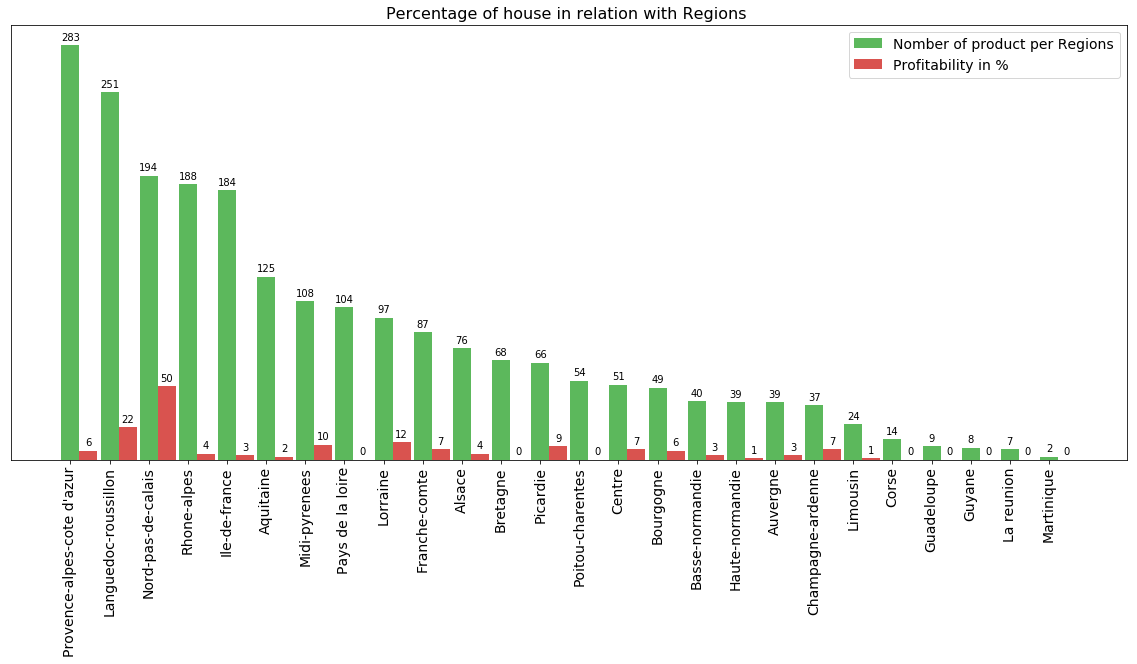

In [183]:
# Figure size
plt.figure(figsize=(20,8))

# the width of the bars
barWidth = 0.46 

#define bar plots
bars1 = df_col['Count']
bars2 = df_col['Profitability >10%']

# Set position of bar on X axis
#r1 = np.arange(len(bars1))
r1 = [x + barWidth for x in r1]
r2 = [x + barWidth for x in r1]

# Make the plot  
rects1= plt.bar(r1, bars1, color='#5cb85c', width=barWidth, edgecolor='', label='Nomber of product per Regions')
rects2= plt.bar(r2, bars2, color='#d9534f', width=barWidth, edgecolor='', label='Profitability in %')

#plot x axis values
#plt.xticks([r + barWidth for r in range(len(bars2))], ['Nord-pas-de-calais','Midi-pyrenees','Languedoc-roussillon','Lorraine','Picardie','Bourgogne','Basse-normandie','Champagne-ardenne','Haute-normandie','Ile-de-france','Provence-alpes-cote','Rhone-alpes'], fontsize=14, rotation=90)

plt.xticks([r + barWidth for r in range(len(bars1))], df_col['Regions'], fontsize=14, rotation=90)
#Attach a text label above each bar in *rects*, displaying its height.
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.title('Percentage of house in relation with Regions ', fontsize=16)

# Plot legeng
plt.legend(fontsize=14)

# How to hide y axis
plt.yticks([])

#fig.tight_layout()
plt.show()
 